# <center>2. Візуальний аналіз даних</center>
## <center>2.2 Приклади використання бібліотек візуального аналізу</center>

Імпортуємо всі необхідні бібліотеки і дещо налаштуємо відображення зображень.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

sns.set(color_codes=True)

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [3]:
!ls /content/gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_2/data	

telecom_churn.csv  video_games_sales.csv


In [ ]:
# якщо у вас шлях відрізняється то відредагуйте
data_folder = "gdrive/My Drive/TEACHING/IntroDataScience/intro_to_data_science/Lec_3_4/data" # шлях до папки з даними на моєму google drive

Зчитуємо в `DataFrame` з даних про відтік клієнтів телеком-оператора. 

In [ ]:
df = pd.read_csv(data_folder+'/telecom_churn.csv')


Перевіримо, чи все зчиталося корректно – подивимося на перші 5 рядків (метод `head`).

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Число рядків (клієнтів) і стовбців (ознак):

In [ ]:
df.shape

(3333, 20)

Подивимося на ознаки і впевнимося, що пропусків ні в одному з них немає – скрізь по 3333 записи.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Подивимося на розподіл цільової змінної – віддтоку клієнтів.


In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

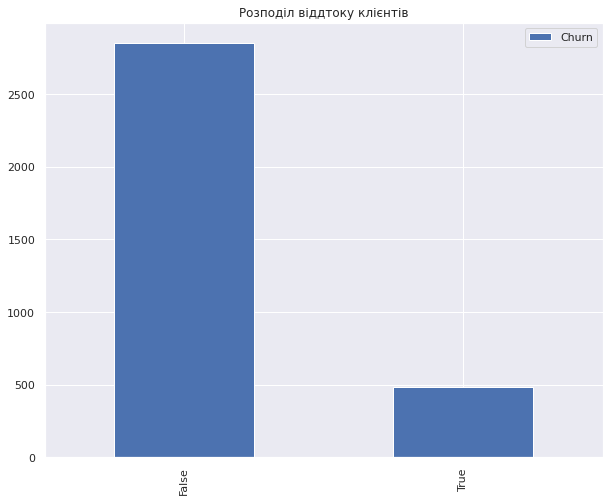

In [ ]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Розподіл віддтоку клієнтів');

Виділимо наступні групи ознак (серед всіх крім Churn ):
бінарні: International plan, Voice mail plan;
категоріальні: State;
порядкові: Customer service calls;
кількісні: всі решта.

Подивимося на кореляції кількісних ознак. 
За розфарбованою матрицею кореляцій видно, що такі ознаки як Total day 
charge розраховуються за проговореними хвилинами (Total day minutes). 
Тобто 4 ознаки можна викинути, вони не несуть корисної інформації.

In [ ]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()

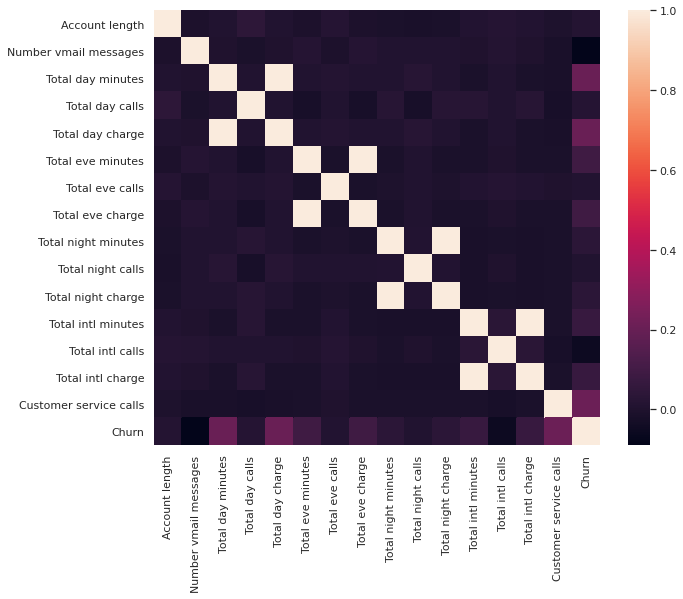

In [ ]:
sns.heatmap(corr_matrix);

Тепер подивимося на розподіл всіх цікавих нам кількісних ознак. 
На бінарні/категоріальні/порядкові ознаки будемо дивитися окремо.

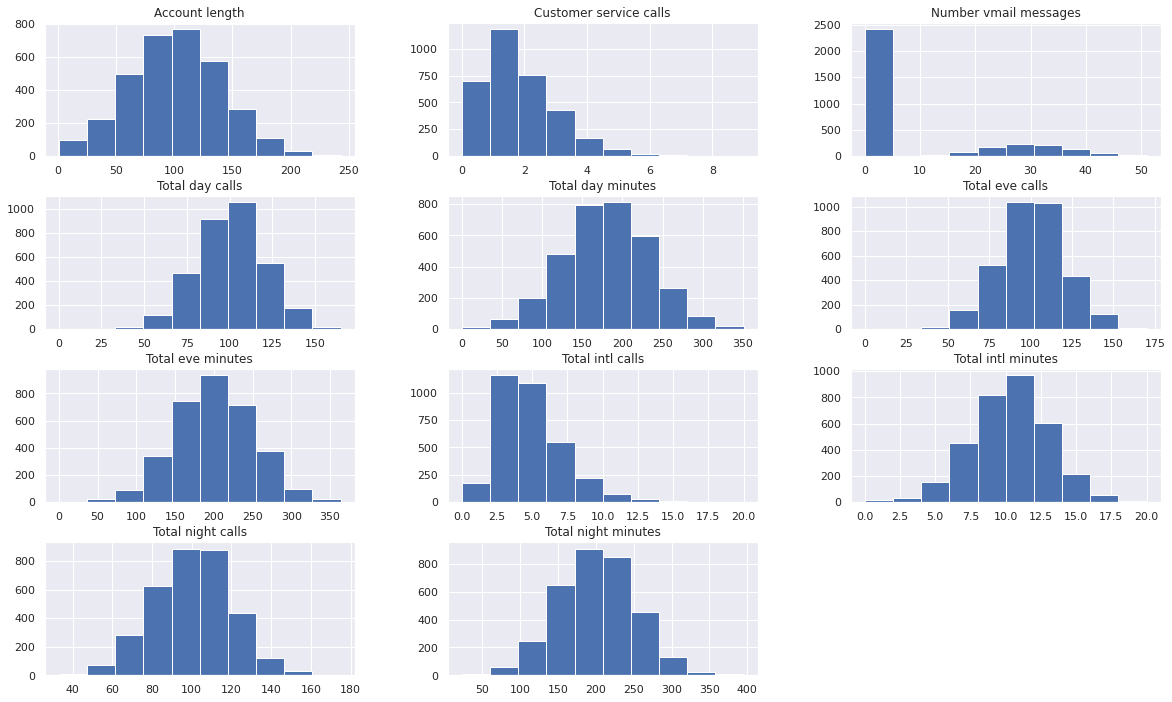

In [ ]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

Бачимо, що більшість ознак розподілені нормально. 
Винятки - число дзвінків в сервісний центр (Customer service calls) 
(тут більше підходить пуассоновским розподіл) і число голосових повідомлень 
(Number vmail messages, пік в нулі, тобто це ті, у кого голосова пошта не підключена). 
Також зміщено розподіл числа міжнародних дзвінків (Total intl calls).

Ще корисно будувати ось такі картинки, де на головній діагоналі малюються розподіл ознак, 
а поза головною діагоналлю - діаграми розсіювання для пар ознак. Буває, що це приводить 
до якихось висновків, але в даному випадку все приблизно зрозуміло, без сюрпризів.

In [ ]:
sns.pairplot(df[features + ['Churn']], hue='Churn');

Output hidden; open in https://colab.research.google.com to view.

Далі подивимося, як ознаки пов'язані з цільовою змінною - з відтоком.

Побудуємо boxplot-и, що описують статистики розподілу кількісних ознак в двох групах: серед лояльних клієнтів та клієнтів, які пішли від оператора.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


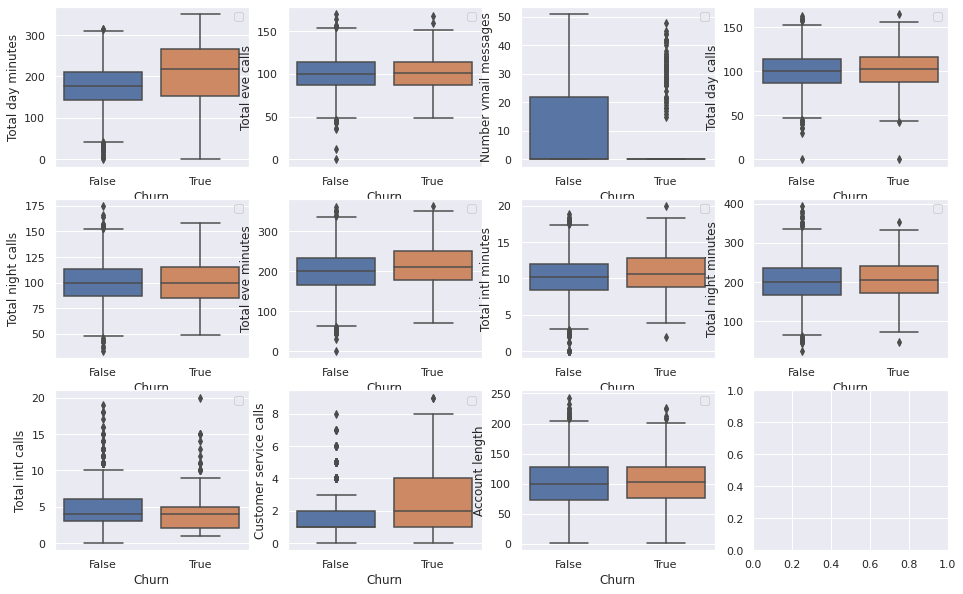

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel('Churn')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

З першого погляду видно, що найбільш помітні відмінності спостерігаються за ознаками Total day minutes, Customer service calls та Number vmail messages. Згодом ми навчимося визначати важливість ознак у завданні класифікації за допомогою випадкового лісу (або градієнтного бустінга), і виявиться, що перші дві - дійсно дуже важливі ознаки для прогнозування відтоку.

Подивимося окремо на картинки з розподілом кіл-ті обговорених вдень ​​хвилин серед лояльних клієнтів/клієнтів, що пішли. 
Зліва - знайомі нам боксплоти, праворуч - згладжені гістограми розподілу числової ознаки в двох групах (красива картинка, все і так все зрозуміло за боксплотами).
Цікаве спостереження: в середньому пішли ті клієнти, що більше користуються зв'язком. Можливо вони незадоволені тарифами і одним із заходів боротьби з відтоком буде зниження тарифних ставок (вартості мобільного зв'язку). Але це вже компанії потрібно буде проводити додатковий економічний аналіз,щоб зрозуміти чи дійсно такі заходи будуть виправдані.


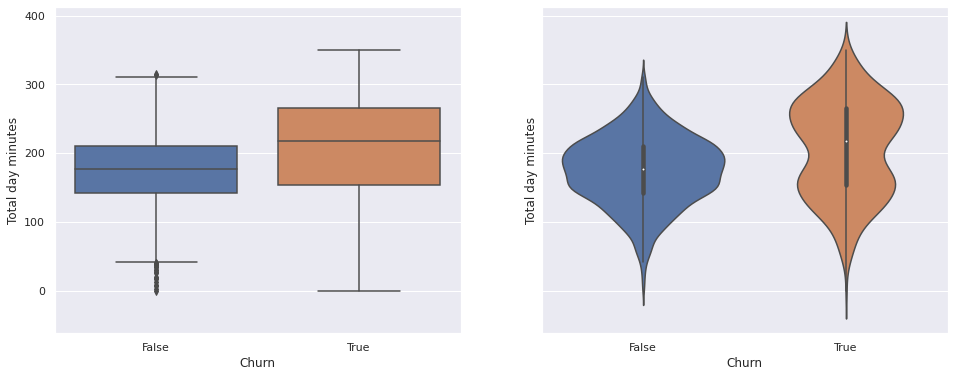

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

Тепер зобразимо розподіл числа звернень в сервісний центр (таку картинку ми будували в попередній лекції). 
Тут унікальних значень ознаки не багато (ознаку можна вважати як кількісною цілочисловою, так і порядковою), тому наочніше зобразити розподіл за допомогою countplot. 
Спостереження: частка відтоку сильно зростає починаючи з 4 дзвінків в сервісний центр.

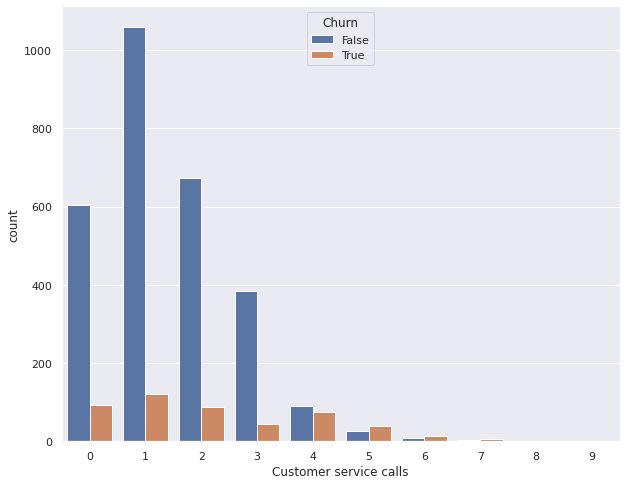

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);


Тепер подивимося на зв'язок бінарних ознак International plan і Voice mail plan з відтоком. 
Спостереження: коли роумінг підключений, частка відтоку набагато вища, тобто наявність міжнародного роумінгу - сильна ознака. Про голосову пошту такого не можна сказати.

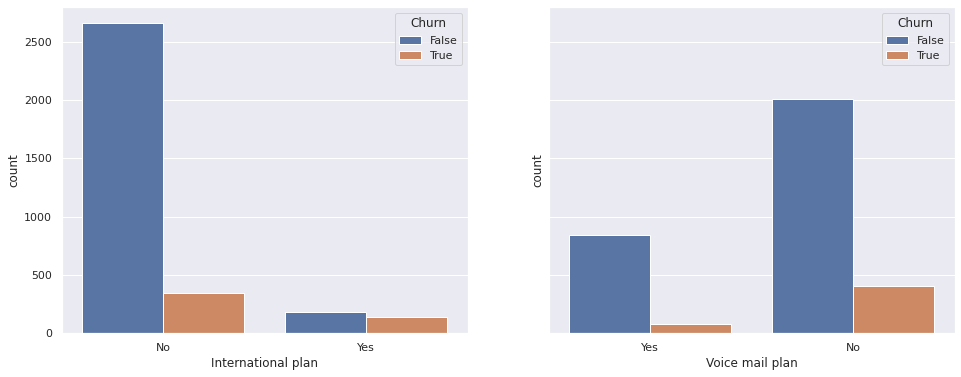

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

Нарешті, подивимося, як з відтоком пов'язана категоріальна ознака State. 
З нею вже не так приємно працювати, оскільки число унікальних штатів досить велике - 51. 
Можна на початку побудувати зведену табличку або порахувати відсоток відтоку для кожного штату. 
Але ми бачимо, що даних по кожному штату окремо замало (пішло клієнтів - всього від 3 до 17), тому, можливо, ознаку State надалі не варто додавати до моделі класифікації через ризик перенавчання (але ми це будемо перевіряти за результатами крос-валідації.

In [ ]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


Долі відтоку для кожного штату:

Видно, що в Нью-Джерсі і Каліфорнії частка відтоку вища 25%, а на Гаваях і в Алясці менше 5%. 
Але ці висновки побудовані за занадто скромною статистикою і можливо, це просто особливості наявних даних (тут можна і гіпотези перевіряти про кореляції 
Метьюса і Крамера, але це вже за рамками цієї лекції).

Нарешті побудуємо t-SNE візуальне подання даних. Назва методу складне - t-distributed Stohastic Neighbor Embedding, математика теж крута (і розбиратися в ній не будемо), але основна ідея проста, як двері: 
    знайдемо таке відображення з багатовимірного простору ознак на площину (або в 3D, але майже завжди вибирають 2D ), щоб точки, які були далеко одна від одної, на площині теж виявилися віддаленими, а близькі точки - також відобразилися в близькі. Тобто neighbor embedding - це свого роду пошук нового подання даних, при якому зберігається сусідство.

Трохи деталей: викинемо штати і ознаку відтоку, а бінарні Yes/No-ознаки переведемо в числа (за допомогою pandas.Series.map). Також потрібно масштабувати вибірку - з кожної ознаки відняти його середнє і поділити на стандартне відхилення, це робить StandardScaler.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
# перетворюємо всі ознаки в числові, відкинувши штати
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 49.5 s, sys: 216 ms, total: 49.7 s
Wall time: 25.5 s


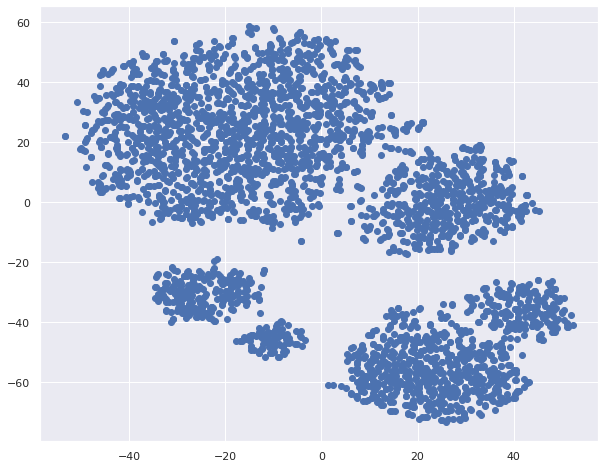

In [ ]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

Розфарбуємо отримане t-SNE подання даних за відтоком (сині - лояльні, помаранчеві - клієнти, що пішли).

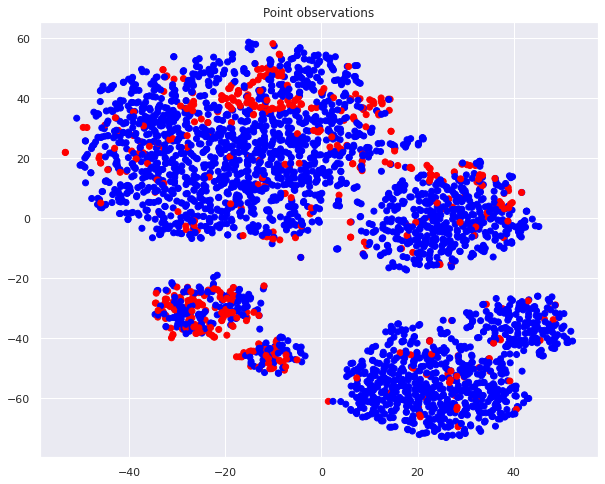

In [ ]:
marker_size=15

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=df['Churn'].astype("int").map({0: 'blue', 1: 'red'}));

plt.title("Point observations")

plt.show()

Бачимо, що клієнти, які пішли, переважно "кучкуються" в деяких областях простору ознак.

Наостанок зазначимо мінуси t-SNE : велика обчислювальна складність. Ось ця реалізація sklearn швидше за все не допоможе у Вашій реальній задачі, на вибірках побільше варто подивитися в бік Multicore-TSNE; картинка може сильно змінитися при зміні random seed, це ускладнює інтерпретацію. 
Ось хороший туторіал по t-SNE. Але в цілому за такими картинками не варто робити далекосяжні висновки - не варто гадати по кавовій гущі. 
Іноді щось кидається в очі і підтверджується при вивченні, але це не часто відбувається.